In [1]:
%load_ext autoreload
%autoreload 2

In this example we are going to train an image classifier with the [EuroSAT](https://github.com/phelber/EuroSAT) dataset.

In [2]:
# RGB version

from pytorch_eo.datasets.eurosat import EuroSATRGB, EuroSAT

ds = EuroSATRGB(batch_size=25)
#ds = EuroSAT(batch_size=25, bands=(3,2,1))

ds.setup()

data already downloaded !
data already extracted !
Number of images: 27000
training samples 17280
validation samples 4320
test samples 5400


In [3]:
ds.classes

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

In [4]:
imgs, labels = next(iter(ds.train_dataloader()))

imgs.shape, labels.shape, imgs.dtype, imgs.max(), imgs.min()

(torch.Size([25, 3, 64, 64]),
 torch.Size([25]),
 torch.float32,
 tensor(1.),
 tensor(0.0745))

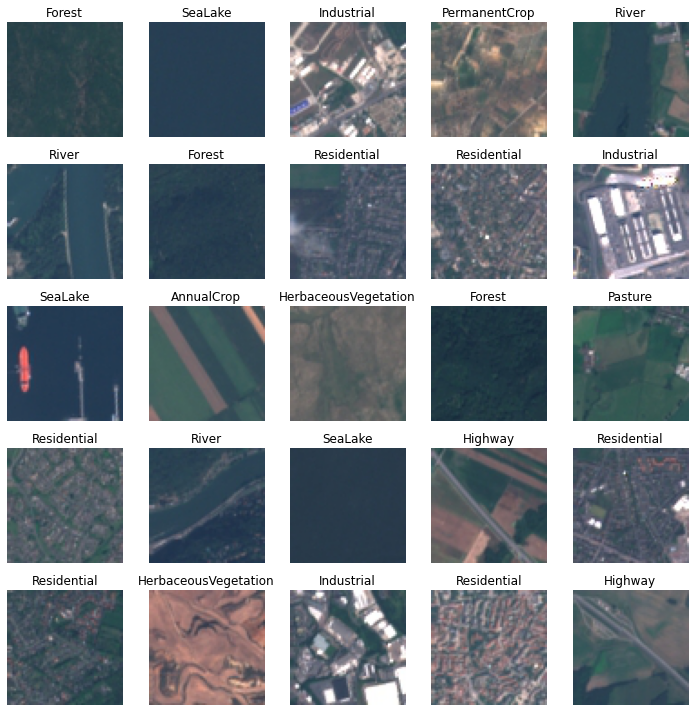

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
for i, (img, label) in enumerate(zip(imgs, labels)):
    ax = plt.subplot(5, 5, i + 1)
    ax.imshow(img.permute(1,2,0))
    ax.set_title(ds.classes[label.item()])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [11]:
from pytorch_eo.tasks.classification import ImageClassifier

model = ImageClassifier(
	backbone='resnet18',
	in_chans=ds.in_chans,
	num_classes=ds.num_classes,
	pretrained=False
)

out = model(imgs)

out.shape, out.dtype, labels.shape, labels.dtype 

(torch.Size([25, 10]), torch.float32, torch.Size([25]), torch.int64)